In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,22977065,1,夜雪,男,38627,https://www.zhihu.com/people/nightsnow,我本是卧龙岗扯淡的人,234314648,2022-12-14 05:57:47,884,5342,702,20210423这回答居然成了话题热门，过了几年不知道被哪位大佬翻牌了。看来天下苦台账久矣！...
1,22977065,1,Marvin Dada,男,12231,https://www.zhihu.com/people/dadamarvin,关注我，告诉你学校外，企业里，社会上的故事。,236152323,2017-10-03 04:23:31,2992,61624,9435,我是个刷盘子的，嗯，国企刷盘工。一天我一个人能刷2500个盘子。因为干的好，被提拔为刷盘组组...
2,22977065,1,奶茶罗先生,男,9998,https://www.zhihu.com/people/jun-luo-86,春风十里不如你，了不起的盖茨比,232469443,2017-09-19 15:04:19,467,3443,306,不是段子。5年前，我们分公司计划在人流量大的体育馆门口买一个门面，以后可以做自营厅。房东报价...
3,22977065,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,258965002,2017-11-12 23:35:49,628,3443,323,低不低我不知道，我只说一件事，不是段子。北京某国字号部门下属一个办事的科，里面一共有5个正式...
4,22977065,1,WEI KAI,男,985,https://www.zhihu.com/people/wei-kai-65,大龄科技男,189797830,2017-09-28 09:08:02,374,2575,360,先做广告：这个回答也是我公众号里的一次推送。有兴趣的话微信搜索 头上有棵树---------...


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (2648, 13)
Shape of DataFrame after removing duplicates: (2648, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,22977065,1,夜雪,男,38627,https://www.zhihu.com/people/nightsnow,我本是卧龙岗扯淡的人,234314648,2022-12-14 05:57:47,884,5342,702,20210423这回答居然成了话题热门，过了几年不知道被哪位大佬翻牌了。看来天下苦台账久矣！...
1,22977065,1,Marvin Dada,男,12231,https://www.zhihu.com/people/dadamarvin,关注我，告诉你学校外，企业里，社会上的故事。,236152323,2017-10-03 04:23:31,2992,61624,9435,我是个刷盘子的，嗯，国企刷盘工。一天我一个人能刷2500个盘子。因为干的好，被提拔为刷盘组组...
2,22977065,1,奶茶罗先生,男,9998,https://www.zhihu.com/people/jun-luo-86,春风十里不如你，了不起的盖茨比,232469443,2017-09-19 15:04:19,467,3443,306,不是段子。5年前，我们分公司计划在人流量大的体育馆门口买一个门面，以后可以做自营厅。房东报价...
3,22977065,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,258965002,2017-11-12 23:35:49,628,3443,323,低不低我不知道，我只说一件事，不是段子。北京某国字号部门下属一个办事的科，里面一共有5个正式...
4,22977065,1,WEI KAI,男,985,https://www.zhihu.com/people/wei-kai-65,大龄科技男,189797830,2017-09-28 09:08:02,374,2575,360,先做广告：这个回答也是我公众号里的一次推送。有兴趣的话微信搜索 头上有棵树---------...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一个", "一来", "一样", "一般", "一转眼",
    "万一", "两", "两个", "俩", "上", "上下", "下", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？"
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.635 seconds.
Prefix dict has been built successfully.


0    [20210423, 回答, 居然, 成, 话题, 热门, 几年, 不, 知道, 哪位, 大...
1    [刷, 盘子, 国企, 刷盘工, 一天, 人能, 刷, 2500, 盘子, 干, 提拔, 为...
2    [段子, 年前, 分公司, 计划, 人流量, 体育馆, 门口, 买, 门面, 以后, 做, ...
3    [低不低, 不, 知道, 说, 一件, 事, 段子, 北京, 国字号, 部门, 下属, 办事...
4    [先, 做广告, 回答, 公众, 号, 一次, 推送, 兴趣, 微信, 搜索, 头上, 有棵...
Name: tokenized_content, dtype: object


In [5]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


In [6]:
import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from torch.nn.functional import softmax
import time

# Set random seed for reproducibility
seed = 59

torch.manual_seed(seed)
np.random.seed(seed)

# Load the pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path  # Make sure 'file_path' is defined somewhere in your code
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using RoBERTa
def roberta_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['回答内容'].apply(roberta_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 22.68006524244944 minutes
一共用时:22.68006524244944分钟
                                   tokenized_content  \
0  ['20210423', '回答', '居然', '成', '话题', '热门', '几年'...   
1  ['刷', '盘子', '国企', '刷盘工', '一天', '人能', '刷', '250...   
2  ['段子', '年前', '分公司', '计划', '人流量', '体育馆', '门口', ...   
3  ['低不低', '不', '知道', '说', '一件', '事', '段子', '北京',...   
4  ['先', '做广告', '回答', '公众', '号', '一次', '推送', '兴趣'...   

                                     sentiment_probs sentiment_label  
0  [0.32854270935058594, 0.33408573269844055, 0.3...         Neutral  
1  [0.3273009955883026, 0.3373042047023773, 0.335...        Negative  
2  [0.32981035113334656, 0.33881011605262756, 0.3...        Negative  
3  [0.3272209167480469, 0.33576759696006775, 0.33...         Neutral  
4  [0.329116553068161, 0.3370225131511688, 0.3338...        Negative  


In [7]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,黑,默,鼓,鼠,鼻,齐,齿,龄,龙,龟
0,3697,1044,521,2,2,4,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4655,1330,664,40,8,9,6,2,5,4,...,0,0,0,0,0,0,0,0,1,0
2,311,90,44,3,1,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,714,204,101,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5369,1520,759,4,2,5,0,0,0,0,...,0,2,1,0,0,1,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,08,10,100,1000,10000,11,12,120,13,14,...,鸡血,麻烦,黑,黑人,默认,默默,鼓励,鼓吹,齐,齐全
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


         08       10  100  1000  10000   11        12  120   13   14  ...  \
0  0.000000  0.00000  0.0   0.0    0.0  0.0  0.024172  0.0  0.0  0.0  ...   
1  0.000000  0.03176  0.0   0.0    0.0  0.0  0.000000  0.0  0.0  0.0  ...   
2  0.000000  0.00000  0.0   0.0    0.0  0.0  0.000000  0.0  0.0  0.0  ...   
3  0.113189  0.00000  0.0   0.0    0.0  0.0  0.000000  0.0  0.0  0.0  ...   
4  0.000000  0.00000  0.0   0.0    0.0  0.0  0.000000  0.0  0.0  0.0  ...   

    鸡血        麻烦    黑   黑人   默认   默默   鼓励   鼓吹    齐   齐全  
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.081918  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 5620 columns]


In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0     10.176695               0
1     10.601557               1
2      4.919382               2
3      6.531820               3
4     14.571444               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index               Top Terms
0     10.176695               0    [记录, 活动, 总结, 计划, 班长]
1     10.601557               1     [盘子, 刷, 个人, 办法, 节约]
2      4.919382               2      [报价, 位, 万, 53, 门面]
3      6.531820               3  [合同工, 正式, 基本上, 员工, 北京]
4     14.571444               4  [boss, 开会, 一种, 院长, 事情]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\public_State_Owned_dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\public_State_Owned_tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


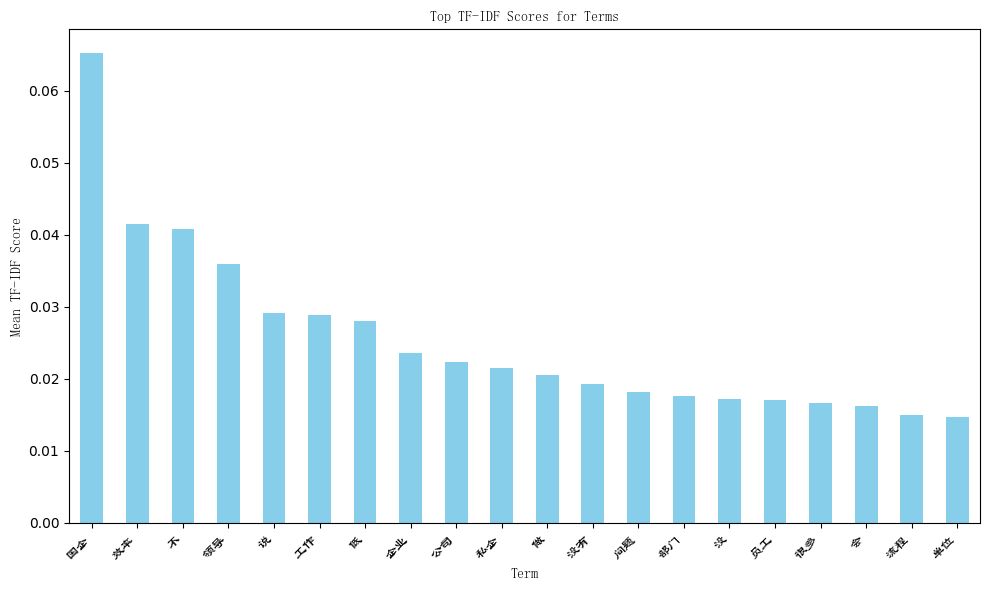

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path =  r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Fonts\SIMLI.TTF'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

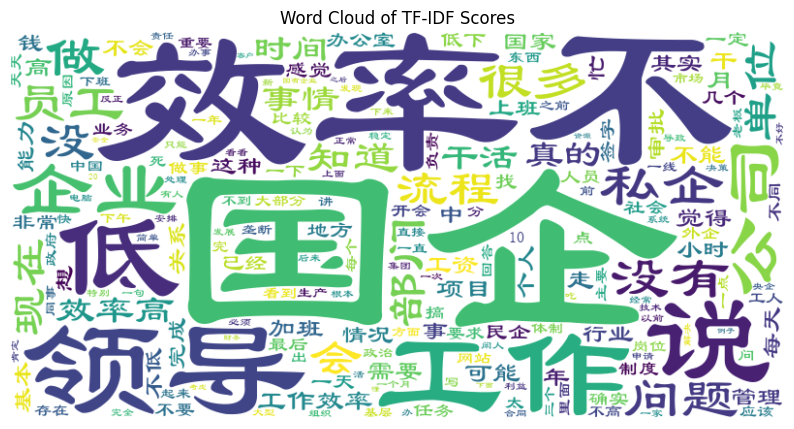

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (2635, 10)
LatentDirichletAllocation(random_state=42)


In [17]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5', 
                 'topic_prob6', 'topic_prob7', 'topic_prob8', 'topic_prob9', 'topic_prob10']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [18]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [19]:
from pyLDAvis import save_html

output_directory = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\Public_State_Owned_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory)
print("Visualized content has been saved to: ", output_directory)


Visualized content has been saved to:  C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\Public_State_Owned_lda_visualization.html


In [20]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory)


True

In [21]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5', 
                       'topic_prob6', 'topic_prob7', 'topic_prob8', 'topic_prob9', 'topic_prob10']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


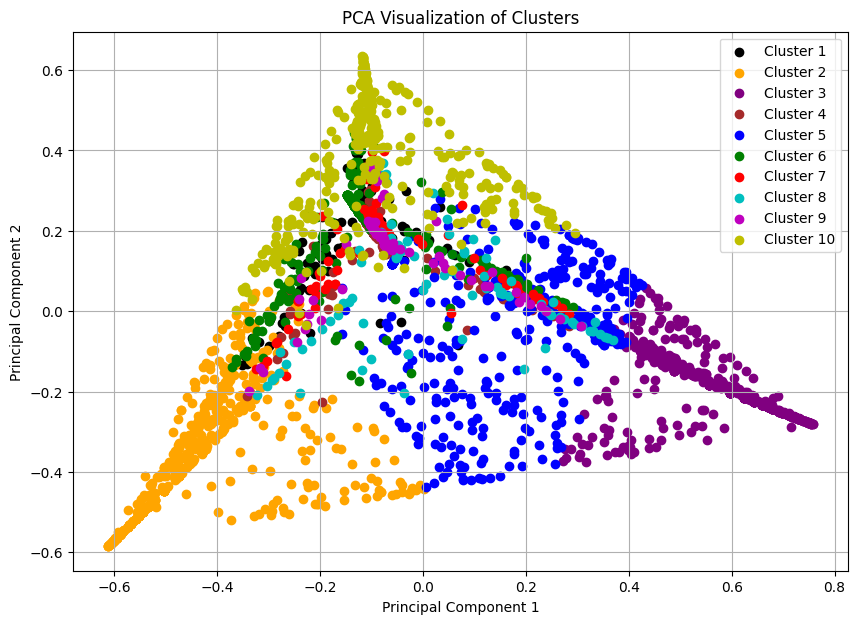

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 10  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['k', 'orange', 'purple', 'brown','b', 'g', 'r', 'c', 'm', 'y']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


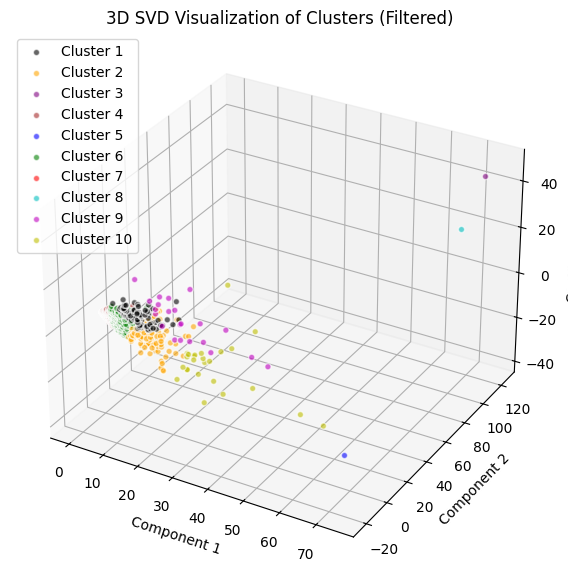

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import zscore

def plot_clusters_3d(dtm, lda_model, num_clusters, threshold):
    # Get dominant topic probabilities for each document
    dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

    # Perform K-means clustering based on dominant topic probabilities
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(dtm)

    # Reduce dimensionality using TruncatedSVD
    svd = TruncatedSVD(n_components=3, random_state=42)  # Reduce to 3 dimensions for visualization
    svd_result = svd.fit_transform(dtm)

    # Calculate Z-scores for the SVD components
    z_scores = np.abs(zscore(svd_result))

    # Filter out points with any Z-score above the threshold
    filtered_indices = np.where((z_scores < threshold).all(axis=1))[0]
    filtered_svd_result = svd_result[filtered_indices]
    filtered_clusters = clusters[filtered_indices]

    # Plot the clusters in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for each cluster
    colors = ['k', 'orange', 'purple', 'brown','b', 'g', 'r', 'c', 'm', 'y']

    for cluster_label, color in zip(range(num_clusters), colors):
        cluster_indices = np.where(filtered_clusters == cluster_label)[0]
        ax.scatter(filtered_svd_result[cluster_indices, 0], filtered_svd_result[cluster_indices, 1], filtered_svd_result[cluster_indices, 2], c=color, label=f'Cluster {cluster_label + 1}', alpha=0.6, edgecolors='w')

    ax.set_title('3D SVD Visualization of Clusters (Filtered)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()
    plt.show()

# Call the function for each cell
plot_clusters_3d(dtm, lda_model, 10, 100)  # Call for the first cell


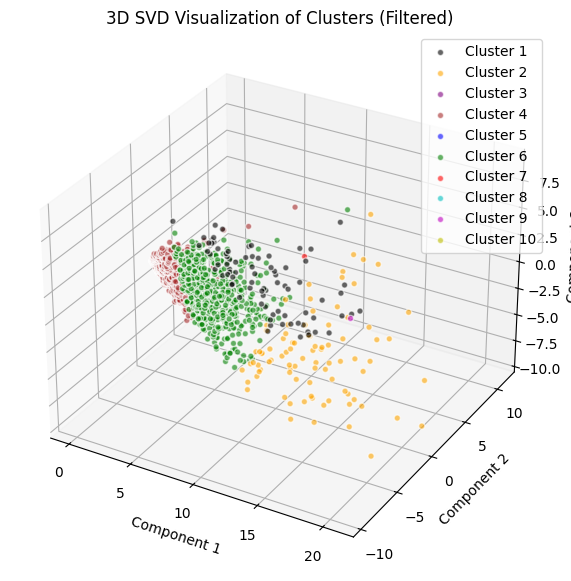

In [24]:
plot_clusters_3d(dtm, lda_model, 10, 3)  # Call for the second cell

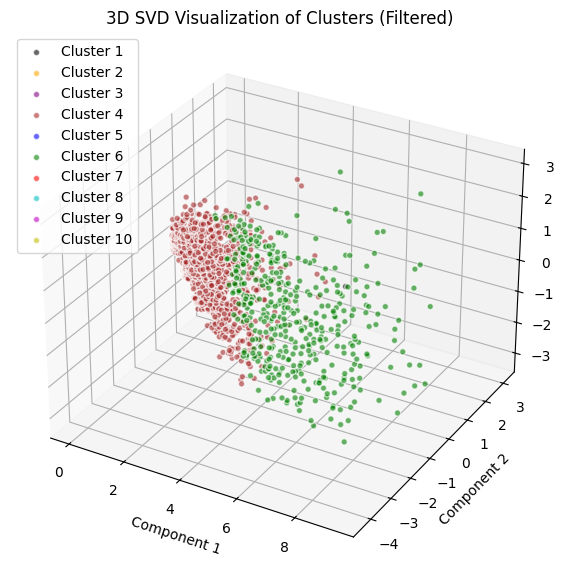

In [25]:
plot_clusters_3d(dtm, lda_model, 10, 1)  # Call for the third cell

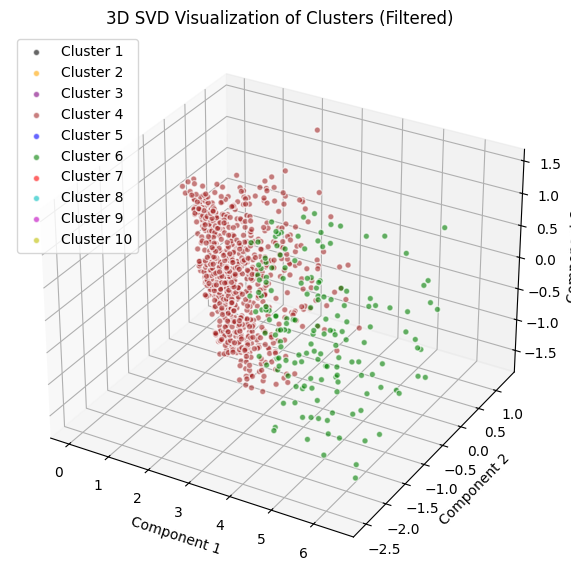

In [26]:
plot_clusters_3d(dtm, lda_model, 10, 0.5)  # Call for the third cell

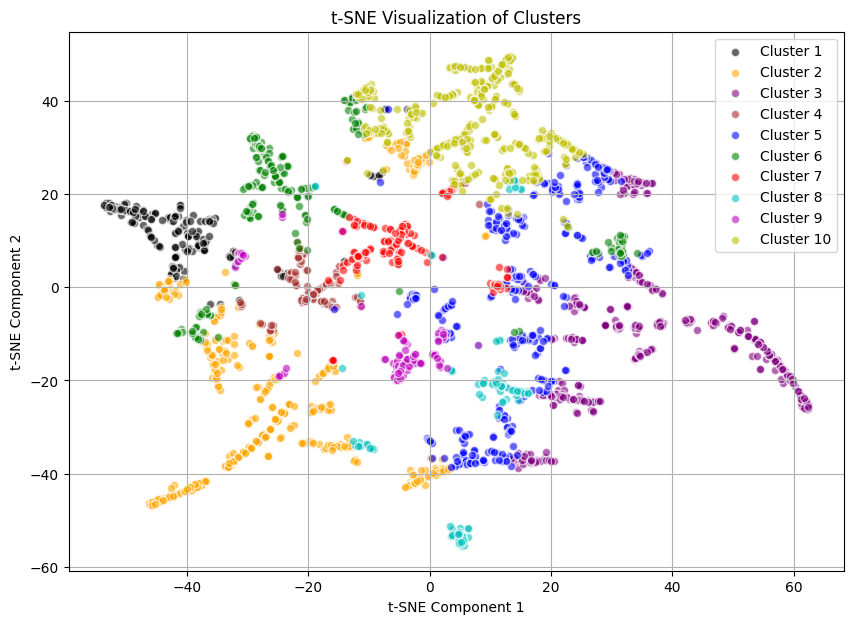

In [27]:
from sklearn.manifold import TSNE

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(lda_output)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(tsne_result[cluster_indices, 0], tsne_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}', alpha=0.6, edgecolors='w')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


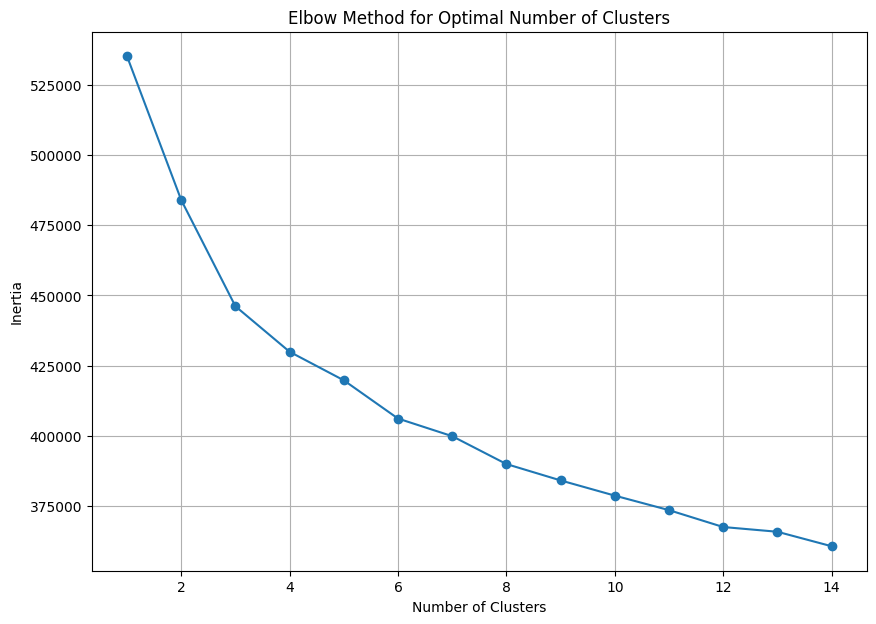

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different numbers of clusters
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtm)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [29]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


In [30]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 领导 齐全 签字 客户 找 a 月 材料 科长 电脑
Cluster 2 Most Frequent Words: 齐全 国企 不 干活 低 知道 领导 效率 国网 真的
Cluster 3 Most Frequent Words: 国企 私企 低 效率 齐全 企业 工作效率 效率高 工作 外企
Cluster 4 Most Frequent Words: 公司 采购 领导 审批 集团 施工 电脑 提交 供应商 项目
Cluster 5 Most Frequent Words: 国企 齐全 国网 国际 企业 国营 国民经济 私企 工作 民企
Cluster 6 Most Frequent Words: 领导 部门 小时 齐全 下午 忙 公司 工作 加班 写
Cluster 7 Most Frequent Words: 流程 审批 齐全 领导 走 工作 签字 计划 慢 有时候
Cluster 8 Most Frequent Words: 效率 企业 国企 低 齐全 发展 取决于 低下 国家 国有企业
Cluster 9 Most Frequent Words: 领导 齐全 快递 网站 邮政 医院 集团 公司 业务 国际
Cluster 10 Most Frequent Words: 领导 部门 国企 做 不 公司 工作 事情 员工 企业

Ten Top Terms for Each Cluster
Cluster 1 top terms: 领导 国企 公司 工作 没有 部门 效率 签字 现在 办公室
Cluster 2 top terms: 国企 效率 领导 工作 没有 单位 干活 知道 公司 问题
Cluster 3 top terms: 国企 效率 私企 企业 工作 很多 问题 没有 员工 领导
Cluster 4 top terms: 领导 公司 企业 采购 国企 需要 审批 作业 时间 工作
Cluster 5 top terms: 国企 效率 企业 工作 领导 没有 公司 问题 很多 员工
Cluster 6 top terms: 领导 国企 工作 公司 部门 效率 每天 员工 时间 加班
Cluster 7 to

In [31]:
# Now you can group the narratives by their assigned thematic clusters
grouped_clusters = df.groupby('cluster_label')

# Iterate over each thematic cluster and access the narratives within each cluster
for cluster_label, group_df in grouped_clusters:
    print(f"Cluster {cluster_label + 1}:")
    print(group_df['tokenized_content'].head())  # Here we pass the already tokenized text instead of the original content
    print()


Cluster 1:
10    ['说', '说', '25', '年前', '国企', '家具厂', '料', '不能',...
15    ['假设', '一条', '大街', '个人', '扫', '垃圾', '头头', '扫',...
28    ['中科院', '某所', '真是', '小刀', '拉', '屁股', '开', '眼',...
45    ['哈哈哈', '我刚', '毕业', '年少无知', '进', '国企', '网络工程',...
49    ['作者', '机械', '专业', '大四', '实习', '进入', '一家', '国企...
Name: tokenized_content, dtype: object

Cluster 2:
3     ['低不低', '不', '知道', '说', '一件', '事', '段子', '北京',...
14    ['东东', '说', '想要', '入', '国企', '央企坑', '亲', '留意',...
17    ['有个', '同事', '45', '岁', '项目', '基层', '工作人员', '每...
19    ['不', '说话', '图', '一副', '概括', '进去', '一直', '觉得',...
20    ['实事求是', '国企', '效率', '私企', '高', '私企', '稳', '市场...
Name: tokenized_content, dtype: object

Cluster 3:
5     ['稍稍', '跑题', '一点', '国企', '中科院', '准确', '讲', '99...
16    ['大多数', '相对', '略低', '少数', '竞争性', '高于', '行业', '...
37    ['不可', '一慨', '而论', '市场化', '行业', '国企', '效率', '不...
38    ['国企', '上班', '喜欢', '整合', '资源', '全力', '推动', '项目...
56    ['近两年', '好多', '朋友', '单位', '跳', '公司', '聊起来', '体...
Name: tokenized_content, dtype: object

Cluster

In [32]:
# Initialize an empty dictionary to store the sentiment distribution for each cluster
sentiment_distribution = {}

# Iterate over each cluster
for cluster, group_df in grouped_clusters:
    # Count the occurrences of each sentiment label in the current cluster
    label_counts = group_df['sentiment_label'].value_counts()
    
    # Calculate the total number of narratives in the current cluster
    total_narratives = label_counts.sum()
    
    # Calculate the proportion of each sentiment label and store it in the sentiment distribution dictionary
    sentiment_distribution[cluster] = {
        'Positive': label_counts.get('Positive', 0) / total_narratives,
        'Negative': label_counts.get('Negative', 0) / total_narratives,
        'Neutral': label_counts.get('Neutral', 0) / total_narratives
    }

# Print the sentiment distribution for each cluster
for cluster, distribution in sentiment_distribution.items():
    print(f"Cluster {cluster + 1}:")
    for sentiment, proportion in distribution.items():
        print(f"   {sentiment}: {proportion:.2%}")
    print()


Cluster 1:
   Positive: 6.25%
   Negative: 78.65%
   Neutral: 15.10%

Cluster 2:
   Positive: 6.72%
   Negative: 79.05%
   Neutral: 14.23%

Cluster 3:
   Positive: 9.79%
   Negative: 78.51%
   Neutral: 11.70%

Cluster 4:
   Positive: 3.19%
   Negative: 77.66%
   Neutral: 19.15%

Cluster 5:
   Positive: 3.79%
   Negative: 82.11%
   Neutral: 14.09%

Cluster 6:
   Positive: 9.84%
   Negative: 74.02%
   Neutral: 16.14%

Cluster 7:
   Positive: 6.54%
   Negative: 80.39%
   Neutral: 13.07%

Cluster 8:
   Positive: 7.32%
   Negative: 74.80%
   Neutral: 17.89%

Cluster 9:
   Positive: 7.84%
   Negative: 77.45%
   Neutral: 14.71%

Cluster 10:
   Positive: 1.61%
   Negative: 75.81%
   Neutral: 22.58%



ValueError: num must be an integer with 1 <= num <= 6, not 7

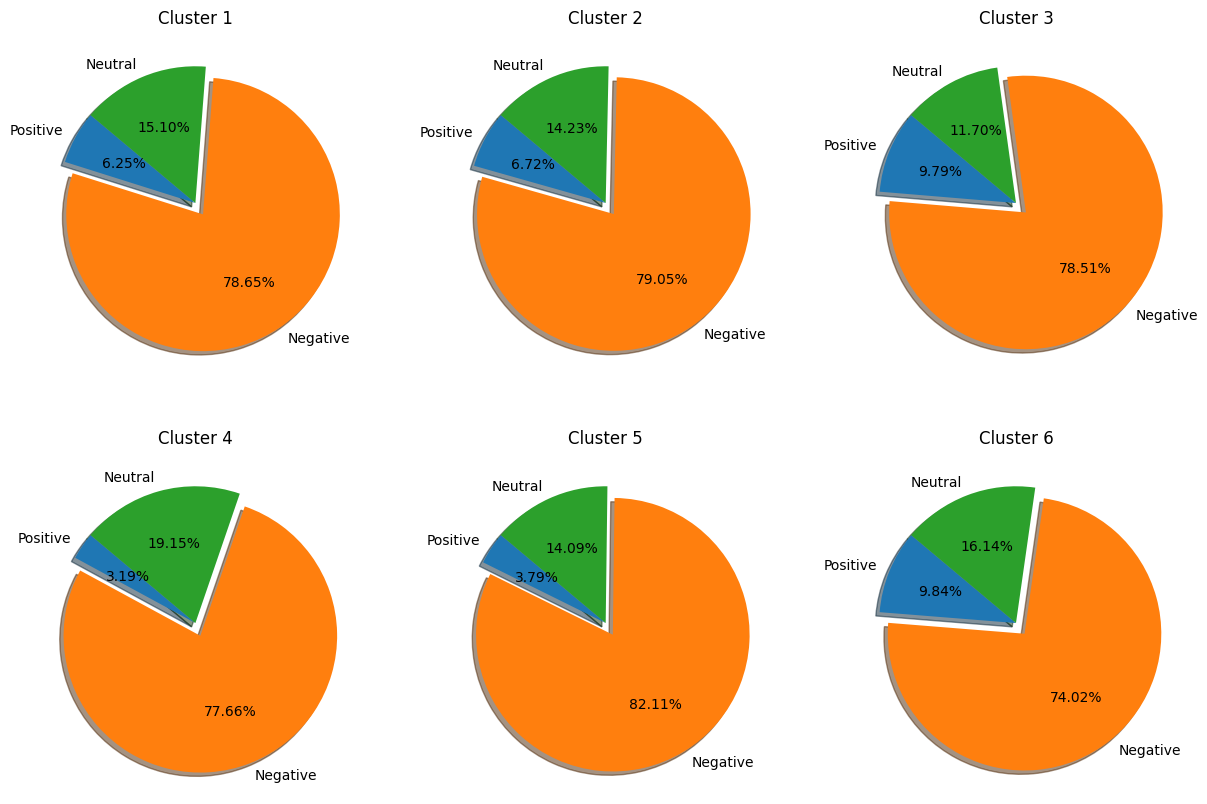

In [33]:
import matplotlib.pyplot as plt

# Plotting pie charts for each cluster
plt.figure(figsize=(15, 10))
for i, (cluster, distribution) in enumerate(sentiment_distribution.items(), 1):
    labels = distribution.keys()
    sizes = distribution.values()
    explode = (0, 0.1, 0)  # explode the 'Negative' slice
    plt.subplot(2, 3, i)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=140)
    plt.title(f"Cluster {cluster + 1}")

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import spacy

# Load the Chinese NER model from spaCy
nlp = spacy.load("zh_core_web_sm")

# Load the CSV file
file_path = file_path
df = pd.read_csv(file_path)

# Define a function to perform Named Entity Recognition (NER) on text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the '回答内容' column and create a new column for named entities
df['named_entities'] = df['回答内容'].apply(perform_ner)

# Display the dataframe with named entities
print(df[['回答内容', 'named_entities']].head())

# Save the named_entities to original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with NER has been saved to the original file:", file_path)


                                                回答内容  \
0  20210423这回答居然成了话题热门，过了几年不知道被哪位大佬翻牌了。看来天下苦台账久矣！...   
1  我是个刷盘子的，嗯，国企刷盘工。一天我一个人能刷2500个盘子。因为干的好，被提拔为刷盘组组...   
2  不是段子。5年前，我们分公司计划在人流量大的体育馆门口买一个门面，以后可以做自营厅。房东报价...   
3  低不低我不知道，我只说一件事，不是段子。北京某国字号部门下属一个办事的科，里面一共有5个正式...   
4  先做广告：这个回答也是我公众号里的一次推送。有兴趣的话微信搜索 头上有棵树---------...   

                                      named_entities  
0  [(20210423, CARDINAL), (几年, DATE), (12月, CARDI...  
1  [(一天, DATE), (2500, CARDINAL), (5, CARDINAL), ...  
2  [(5年前, DATE), (房东, ORG), (180万, CARDINAL), (53...  
3  [(北京, GPE), (5, CARDINAL), (15, CARDINAL), (一块...  
4  [(五年, DATE), (阿姨们总会, ORG), (2012年, DATE), (200...  
DataFrame with NER has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


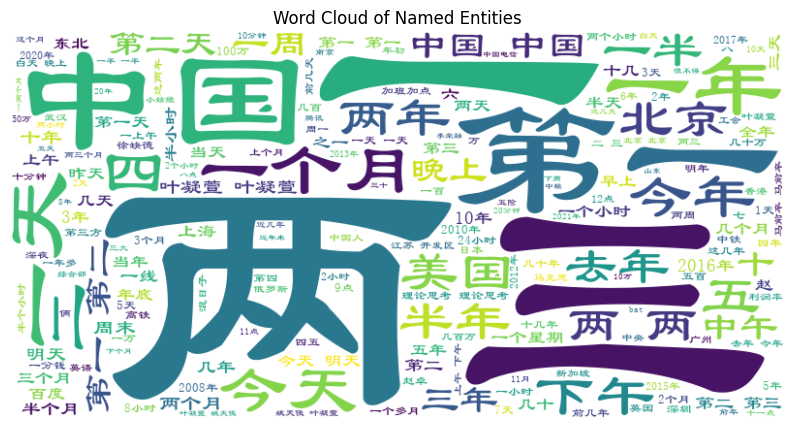

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of named entities
all_named_entities = [ent[0] for ents in df['named_entities'] for ent in ents]

# Join all named entities into a single string
all_named_entities_text = ' '.join(all_named_entities)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_named_entities_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Named Entities')
plt.axis('off')
plt.show()


In [36]:
from collections import Counter

# Function to extract named entities of a specific type from the dataframe
def extract_entities_by_type(entity_type):
    all_entities = [entity[0] for entities_list in df['named_entities'] for entity in entities_list if entity[1] == entity_type]
    return all_entities

# List of entity types
entity_types = ['GPE', 'ORG', 'NORP', 'PERSON', 'WORK_OF_ART', 'FAC', 'LOC', 'PRODUCT', 'EVENT', 'LANGUAGE', 'LAW', 'TIME', 'PERCENT', 'QUANTITY', 'ORDINAL', 'MISC']

# Iterate over each entity type and print the top 10 most frequent entities
for entity_type in entity_types:
    entities = extract_entities_by_type(entity_type)
    entity_counter = Counter(entities)
    top_entities = entity_counter.most_common(10)
    print(f"Top 10 {entity_type}:")
    for entity, count in top_entities:
        print(entity, count)
    print()


Top 10 GPE:
中国 265
北京 85
美国 71
上海 34
俄罗斯 34
苏州 21
利润率 21
江苏 16
日本 15
中铁 14

Top 10 ORG:
工会 20
百度 20
腾讯 20
中国邮政 14
高铁 13
人事部 11
中央 11
一汽 10
bat 9
中国电信 9

Top 10 NORP:
中国人 12
中国 11
食堂 4
华山派 4
美国人 3
阿里 3
北京人 3
美式 2
俄罗斯人 2
印度人 2

Top 10 PERSON:
叶凝萱 122
姚天俊 21
赵 20
马前卒 16
赵卓 16
宋晨 16
马克思 15
徐缺德 12
综合部 10
李荣融 9

Top 10 WORK_OF_ART:
理论思考 46
孙悟空 9
办法 4
1. 4
百炼成钢：中国共产党 3
电梯乘客行为守则 2
人性天书72卷 2
财富 2
彩铃声声迎新春 2
资治通鉴 1

Top 10 FAC:
金字塔 4
垄断性国企 3
金毛子 3
中层 2
地铁站 2
上海火车站 2
南阳油田 2
苏州工业园区 1
黄埔船厂 1
太naive 1

Top 10 LOC:
东北 21
开发区 12
大方向 7
中层 7
华山派 7
欧洲 6
登月 6
江南 5
长江 5
中东 4

Top 10 PRODUCT:
word 7
歼20 6
word文件 2
运20 2
b公司 2
996 1
北斗 1
4. 1
导向形 1
波音相比 1

Top 10 EVENT:
奥运 3
九点多 3
申奥 2
二战 2
两会 2
十八届三中全会 1
文革 1
北方兵器工业公司 1
世界杯 1
纪委 1

Top 10 LANGUAGE:
英语 11
英文 7
语文 2
中文 2
温水煮青蛙 1
嵌入式 1
付进 1
西班牙语 1

Top 10 LAW:
电梯驾驶员 2
超级工程 2
马钢宪法 1
国家改造法大纲 1
劳动法 1
当代经济研究 1
共产党宣言 1
资本论 1
反对自由主义 1

Top 10 TIME:
下午 94
晚上 61
中午 50
上午 36
早上 27
半天 23
一个小时 23
白天 22
半小时 21
24小时 16

Top 10 PERCENT:
20% 19
80% 13
1. 13
30% 7
百分之九十九 4
四分之

In [37]:
import pandas as pd
import re

# Define aspect-related terms and corresponding regular expressions based on the most frequent words and top terms from clusters
aspect_patterns = {
    'management_and_governance': r'(管理|治理|领导|决策|执行|监督|管理层|治理结构|领导班子)',
    'bureaucracy_and_red_tape': r'(官僚|繁文缛节|手续|流程|审批|办事效率|层级|官僚主义)',
    'financial_performance': r'(财务|盈利|亏损|收入|成本|预算|财务状况|资金管理|财政)',
    'employee_performance': r'(员工|绩效|效率|工作态度|生产力|生产效率|工作效率|人力资源)',
    'political_influence': r'(政治|干预|影响|政策|政治因素|政府|党政关系|政企关系)',
    'innovation_and_technology': r'(创新|技术|研发|科研|技术水平|技术创新|科技|研发投入)',
    'market_competition': r'(竞争|市场|市场竞争|私营企业|竞争力|竞争优势)',
    'resource_allocation': r'(资源|配置|分配|资源利用|资源管理|资源浪费)',
    'corruption_and_fraud': r'(腐败|贪污|舞弊|贿赂|腐化|违规|腐败行为)',
    # Add more aspect patterns based on the identified aspects and their associated terms
}



# Define a function to perform rule-based aspect identification
def identify_aspects(text):
    aspects = []
    for aspect, pattern in aspect_patterns.items():
        matches = re.findall(pattern, text)
        if matches:
            aspects.append(aspect)  # Append the aspect category instead of the matched keyword
    if not aspects:
        aspects.append('others')  # Append 'others' if no aspect matches
    return aspects

# Apply rule-based aspect identification to the '回答内容' column
df['aspect_candidates'] = df['回答内容'].apply(identify_aspects)

# Display the dataframe with identified aspect categories
print(df[['回答内容', 'aspect_candidates']].head())

# Save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with Rule-Based Aspect Identification has been saved to the original file:", file_path)


                                                回答内容  \
0  20210423这回答居然成了话题热门，过了几年不知道被哪位大佬翻牌了。看来天下苦台账久矣！...   
1  我是个刷盘子的，嗯，国企刷盘工。一天我一个人能刷2500个盘子。因为干的好，被提拔为刷盘组组...   
2  不是段子。5年前，我们分公司计划在人流量大的体育馆门口买一个门面，以后可以做自营厅。房东报价...   
3  低不低我不知道，我只说一件事，不是段子。北京某国字号部门下属一个办事的科，里面一共有5个正式...   
4  先做广告：这个回答也是我公众号里的一次推送。有兴趣的话微信搜索 头上有棵树---------...   

                                   aspect_candidates  
0  [management_and_governance, employee_performan...  
1  [management_and_governance, bureaucracy_and_re...  
2  [management_and_governance, bureaucracy_and_re...  
3  [management_and_governance, employee_performan...  
4  [management_and_governance, bureaucracy_and_re...  
DataFrame with Rule-Based Aspect Identification has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\State_Owned_Companies\CSV\Public\State_Owned.csv


In [38]:
from collections import Counter

# Count the frequency of each aspect category
aspect_counts = Counter([item for sublist in df['aspect_candidates'] for item in sublist])

# Store the counts of each aspect category into variables
management_and_governance_count = aspect_counts.get('management_and_governance', 0)
bureaucracy_and_red_tape_count = aspect_counts.get('bureaucracy_and_red_tape', 0)
financial_performance_count = aspect_counts.get('financial_performance', 0)
employee_performance_count = aspect_counts.get('employee_performance', 0)
political_influence_count = aspect_counts.get('political_influence', 0)
innovation_and_technology_count = aspect_counts.get('innovation_and_technology', 0)
market_competition_count = aspect_counts.get('market_competition', 0)
resource_allocation_count = aspect_counts.get('resource_allocation', 0)
corruption_and_fraud_count = aspect_counts.get('corruption_and_fraud', 0)
others_count = aspect_counts.get('others', 0)

# Display the counts
print("Management and Governance Count:", management_and_governance_count)
print("Bureaucracy and Red Tape Count:", bureaucracy_and_red_tape_count)
print("Financial Performance Count:", financial_performance_count)
print("Employee Performance Count:", employee_performance_count)
print("Political Influence Count:", political_influence_count)
print("Innovation and Technology Count:", innovation_and_technology_count)
print("Market Competition Count:", market_competition_count)
print("Resource Allocation Count:", resource_allocation_count)
print("Corruption and Fraud Count:", corruption_and_fraud_count)
print("Others Count:", others_count)


Management and Governance Count: 1072
Bureaucracy and Red Tape Count: 509
Financial Performance Count: 396
Employee Performance Count: 1580
Political Influence Count: 408
Innovation and Technology Count: 274
Market Competition Count: 333
Resource Allocation Count: 203
Corruption and Fraud Count: 55
Others Count: 590


C:\Users\jesse\anaconda3\Lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap()


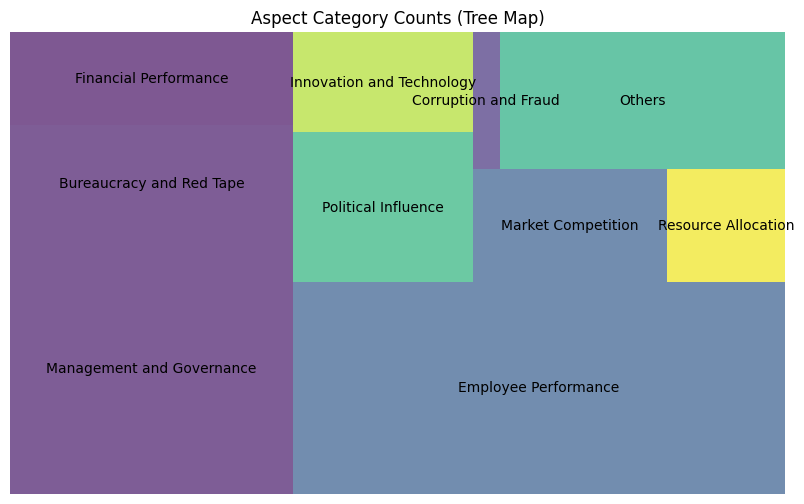

In [39]:
import matplotlib.pyplot as plt
import squarify

# Create a dictionary to store aspect category counts
aspect_counts_dict = {
    'Management and Governance': management_and_governance_count,
    'Bureaucracy and Red Tape': bureaucracy_and_red_tape_count,
    'Financial Performance': financial_performance_count,
    'Employee Performance': employee_performance_count,
    'Political Influence': political_influence_count,
    'Innovation and Technology': innovation_and_technology_count,
    'Market Competition': market_competition_count,
    'Resource Allocation': resource_allocation_count,
    'Corruption and Fraud': corruption_and_fraud_count,
    'Others': others_count
}

# Plotting the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=aspect_counts_dict.values(), label=aspect_counts_dict.keys(), alpha=0.7)
plt.axis('off')
plt.title('Aspect Category Counts (Tree Map)')
plt.show()


In [40]:
# Define a function to calculate sentiment distribution for each aspect category
def calculate_sentiment_distribution(df, aspect):
    aspect_rows = df[df['aspect_candidates'].apply(lambda x: aspect in x)]
    sentiment_distribution = aspect_rows['sentiment_label'].value_counts(normalize=True) * 100
    sentiment_distribution = sentiment_distribution.round(2)
    return sentiment_distribution

# List of aspects
aspects = [
    'Management and Governance',
    'Bureaucracy and Red Tape',
    'Financial Performance',
    'Employee Performance',
    'Political Influence',
    'Innovation and Technology',
    'Market Competition',
    'Resource Allocation',
    'Corruption and Fraud',
    'Others'
]

# Calculate and print sentiment distribution for each aspect
for aspect in aspects:
    sentiment_distribution = calculate_sentiment_distribution(df, aspect)
    print(f"Sentiment distribution for '{aspect}':")
    print("Positive:", sentiment_distribution.get('Positive', 0), "%")
    print("Negative:", sentiment_distribution.get('Negative', 0), "%")
    print("Neutral:", sentiment_distribution.get('Neutral', 0), "%")
    print()


Sentiment distribution for 'Management and Governance':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Bureaucracy and Red Tape':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Financial Performance':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Employee Performance':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Political Influence':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Innovation and Technology':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Market Competition':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Resource Allocation':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Corruption and Fraud':
Positive: 0 %
Negative: 0 %
Neutral: 0 %

Sentiment distribution for 'Others':
Positive: 0 %
Negative: 0 %
Neutral: 0 %



In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot pie chart for sentiment distribution
def plot_sentiment_pie_chart(sentiment_distribution, aspect):
    labels = sentiment_distribution.index
    sizes = sentiment_distribution.values
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0)  # explode the 1st slice (positive sentiment)

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f"Sentiment distribution for '{aspect}'")
    plt.show()

# Plot pie charts for sentiment distribution of each aspect
for aspect in aspects:
    sentiment_distribution = calculate_sentiment_distribution(df, aspect)
    plot_sentiment_pie_chart(sentiment_distribution, aspect)


In [ ]:
import pandas as pd
import gc

def get_dataframes_in_memory():
    """
    Get the names and number of DataFrames currently in memory.
    """
    dataframes = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    return dataframes

# Print the names and number of DataFrames currently in memory
dataframes_in_memory = get_dataframes_in_memory()
num_dataframes = len(dataframes_in_memory)
print(f"Number of DataFrames in memory: {num_dataframes}")

if num_dataframes > 0:
    print("Names of DataFrames in memory:")
    for name, _ in dataframes_in_memory:
        print(name)
